# 5장 인공지능 학습

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [67]:
# !sudo apt-get install -y fonts-nanum* | tail -n 1
# !sudo fc-cache -fv
# !rm -rf ~/.cache/matplotlib

In [68]:
# 필요 라이브러리 설치

# !pip install torchviz | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [69]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [70]:
# 파이토치 관련 라이브러리
import torch
from torchviz import make_dot

In [71]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [72]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

In [73]:
#수치 미분                               
def f(x):
    y=x**2 

    return y

def numer_ic_diff(x, h:float):
    y= (f(x+h) -f(x-h))/(2*h)
    return y 

slope = numer_ic_diff(2,0.001)
print("slope_1 =",slope)


slope_1 = 3.9999999999995595


## 경사 하강법  (Gradient descent, GD) 구현

### GD 3D plot

In [74]:
def L(u, v):
    return 3 * u**2 + 3 * v**2 - u*v + 7*u - 7*v + 10
def Lu(u, v):
    return 6* u - v + 7
def Lv(u, v):
    return 6* v - u - 7

u = np.linspace(-5, 5, 501)
v = np.linspace(-5, 5, 501)
U, V = np.meshgrid(u, v)
Z = L(U, V)

In [75]:
# 경사 하강법 시뮬레이션
W = np.array([4.0, 4.0])
W1 = [W[0]]
W2 = [W[1]]
N = 21
alpha = 0.05
for i in range(N):
    W = W - alpha *np.array([Lu(W[0], W[1]), Lv(W[0], W[1])])
    W1.append(W[0])
    W2.append(W[1])

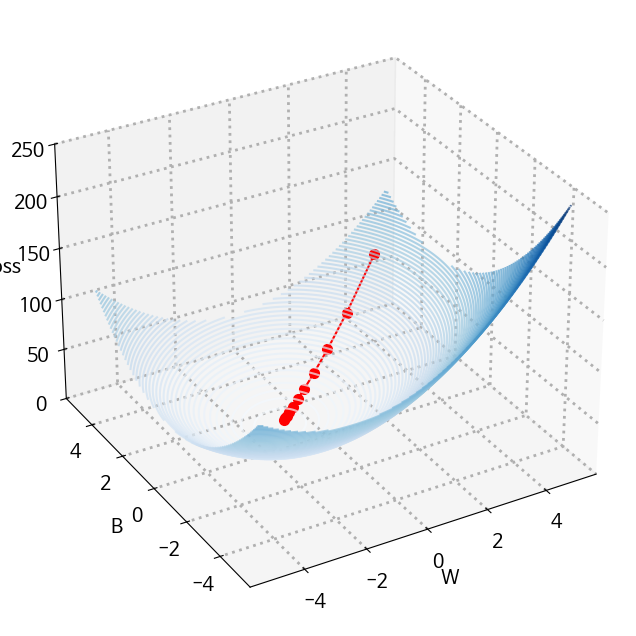

In [76]:
n_loop=11

WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_zlim(0,250)
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('loss')
ax.view_init(30, 240)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=0.7)
ax.plot3D(WW1, WW2, ZZ, 'o-', c='r', alpha=1, markersize=7)
plt.show()

### 데이터 전처리
다섯명의 신장과 체중 데이터를 사용한다.  
1차 함수를 사용해 신장으로 체중을 예측하는 경우, 최적 직선을 구하는 것이 목적이다.

In [77]:
# 샘플 데이터 선언
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0,60.1]
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [78]:
# 머신러닝 모델에서 사용하기 위해, 신장을 변수 x로,
# 체중을 변수 y로 함

x = sampleData1[:,0]
y = sampleData1[:,1]

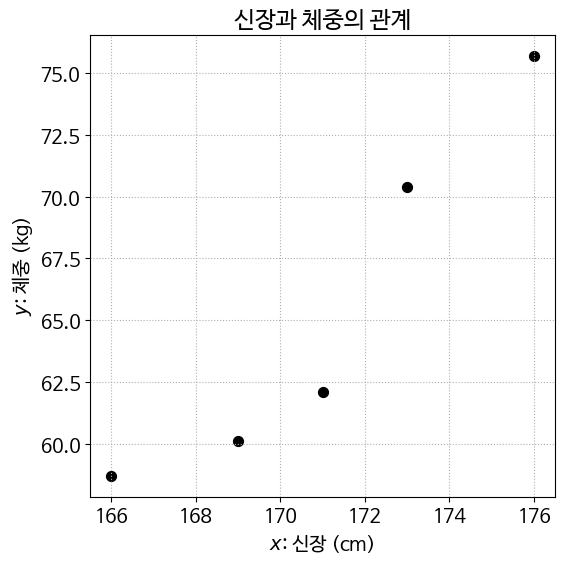

In [79]:
# 산포도 출력 확인

plt.scatter(x,  y,  c='k',  s=50)
# plt.plot([166, 176], [60, 75], 'r:')
plt.xlabel('$x$: 신장 (cm) ')
plt.ylabel('$y$: 체중 (kg)')
plt.title('신장과 체중의 관계')
plt.show()

### 데이터 변환
머신러닝 모델에서 데이터는 0에 가까운 값을 갖는 것이 바람직하다.
따라서, x, y 모두 평균값이 0이 되도록 평행이동시켜서 새로운 좌표계를 X, Y로 한다.

In [80]:
X = x - x.mean()
Y = y - y.mean()

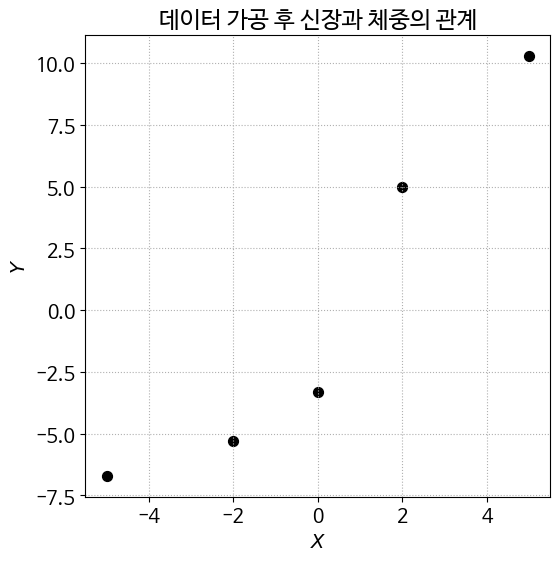

In [81]:
# 산포도를 통해 결과 확인

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('데이터 가공 후 신장과 체중의 관계')
plt.show()

### 예측 계산

In [82]:
# X와 Y를 텐서 변수로 변환
#training data 

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

# 결과 확인

print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [83]:
# 파라미터 정의
# W와 B는 경사 계산을 위해, requires_grad=True 로 설정함

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [84]:
# 예측 함수는 1차 함수

def pred(X):
    return W * X + B

In [85]:
# 예측 값 계산

Yp =  pred(X)

# 결과 확인

print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


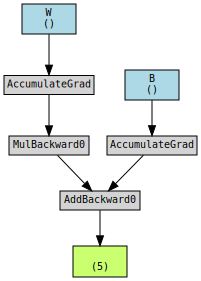

In [86]:
# 예측 값의 계산 그래프 표시

params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)

### 손실 계산

In [87]:
# 평균 제곱 오차 손실함수

def mse(Yp, Y):
    loss = ((Yp - Y) ** 2).mean()
    return loss

In [88]:
# 손실 계산

loss = mse(Yp, Y) #scalar

# 결과 표시

print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


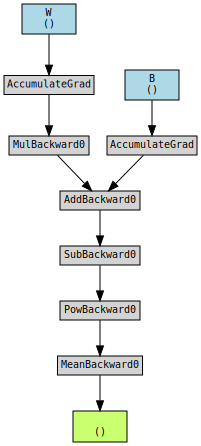

In [89]:
# 손실 계산 그래프 출력

params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)

### 경사 계산

In [90]:
# 경사 계산

loss.backward()
# loss.backward(retain_graph=True)


In [91]:
# 경삿값 확인

print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


### 파라미터 수정

In [92]:
# 학습률 정의

lr = 0.001

W와 B는 한번 계산이 끝났기 때문에, 이 상태로 값의 갱신은 불가능하다.
따라서, 다음과 같이 수정해야 한다.

In [93]:
#  경사를 기반으로 파라미터 수정

# W -= lr * W.grad
# B -= lr * B.grad ## Error

#Gradient descent 
with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad

    # 계산이 끝난 경삿값을 초기화함
    W.grad.zero_()
    B.grad.zero_()


In [94]:
# 파라미터 경삿값 확인

print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


### 반복 계산

In [108]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [109]:
# 루프 처리

for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(X)

    # 손실 계산
    loss = mse(Yp, Y)

    # 경사 계산
    loss.backward() #Gradient 

    with torch.no_grad():
        # 파라미터 수정
        W -= lr * W.grad
        B -= lr * B.grad

        # 경삿값 초기화
        W.grad.zero_()
        B.grad.zero_()

    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()]).reshape(1, 2)  # 2차원으로!
        history = np.vstack([history, item])
        print(f'epoch = {epoch}, loss = {loss.item():.4f}')

epoch = 0, loss = 13.3520
epoch = 10, loss = 10.3855
epoch = 20, loss = 8.5173
epoch = 30, loss = 7.3364
epoch = 40, loss = 6.5858
epoch = 50, loss = 6.1047
epoch = 60, loss = 5.7927
epoch = 70, loss = 5.5868
epoch = 80, loss = 5.4476
epoch = 90, loss = 5.3507
epoch = 100, loss = 5.2805
epoch = 110, loss = 5.2275
epoch = 120, loss = 5.1855
epoch = 130, loss = 5.1507
epoch = 140, loss = 5.1208
epoch = 150, loss = 5.0943
epoch = 160, loss = 5.0703
epoch = 170, loss = 5.0480
epoch = 180, loss = 5.0271
epoch = 190, loss = 5.0074
epoch = 200, loss = 4.9887
epoch = 210, loss = 4.9708
epoch = 220, loss = 4.9537
epoch = 230, loss = 4.9373
epoch = 240, loss = 4.9217
epoch = 250, loss = 4.9066
epoch = 260, loss = 4.8922
epoch = 270, loss = 4.8783
epoch = 280, loss = 4.8650
epoch = 290, loss = 4.8522
epoch = 300, loss = 4.8399
epoch = 310, loss = 4.8281
epoch = 320, loss = 4.8167
epoch = 330, loss = 4.8058
epoch = 340, loss = 4.7953
epoch = 350, loss = 4.7853
epoch = 360, loss = 4.7756
epoch = 37

### 결과 평가

In [110]:
# 최종 파라미터 값
#초기값 W=1, B=1 
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태 : 손실:{history[0,1]:.4f}')
print(f'최종상태 : 손실:{history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
초기상태 : 손실:13.3520
최종상태 : 손실:4.6796


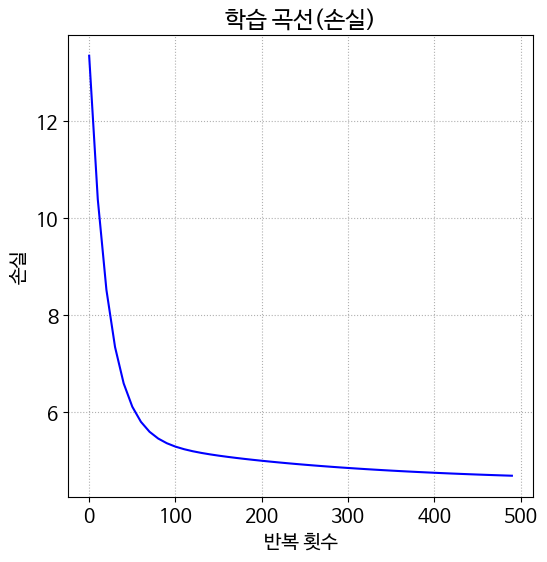

In [111]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

### 산포도에 회귀 직선을 동시에 출력함

In [112]:
# x의 범위를 구함(Xrange)
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 이와 대응하는 예측값 y를 구함
Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


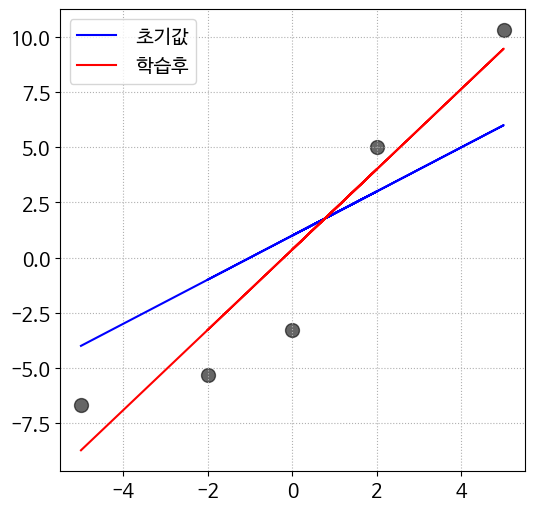

In [114]:
plt.scatter(X.detach().numpy(),Y.detach().numpy(),c="k",s=100,alpha=0.6)
#W=1, B=1 
plt.plot(X.detach().numpy(),X.detach().numpy()+1,c="b",label=" 초기값")
plt.plot(X.detach().numpy(),1.82*X.detach().numpy()+0.3675,c="r",label=" 학습후")
plt.legend()
plt.show() 

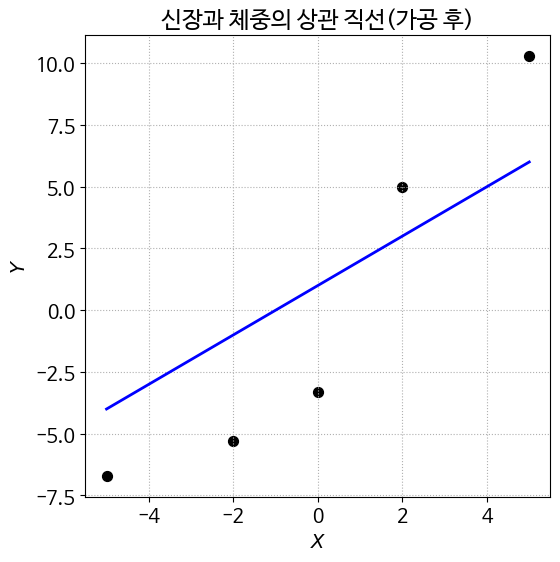

In [ ]:
# 그래프 출력

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 후)')
plt.show()

### 가공 전 데이터로 회귀 직선 출력

In [ ]:
# y좌표와 x좌표 값 계산

x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

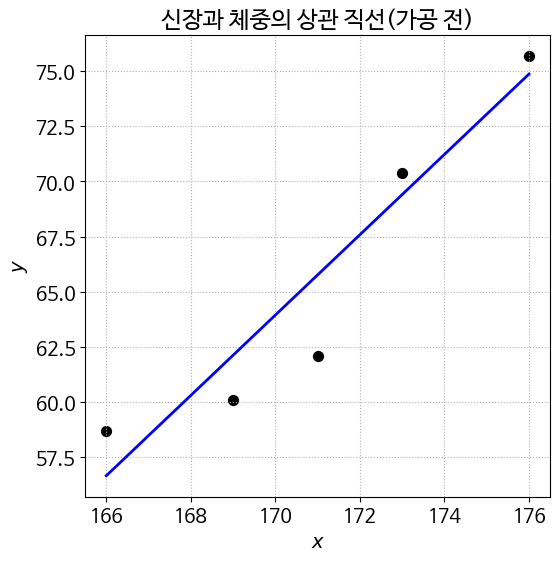

In [ ]:
# 그래프 출력

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 전)')
plt.show()

### 최적화 함수와 step 함수 이용하기

In [115]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer 로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [ ]:
# 루프 처리

for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(X)

    # 손실 계산
    loss = mse(Yp, Y)

    # 경삿값 초기화
    optimizer.zero_grad() #Gradient descent대신 사용 

# #Gradient descent 
# with torch.no_grad():
#     W -= lr * W.grad #학습률을 곱하여 기울기만큼 파라미터 업데이트
#     B -= lr * B.grad

#     # 계산이 끝난 경삿값을 초기화함
#     W.grad.zero_() #다음 epoch에서 누적되지 않도록 기울기 초기화

    B.grad.zero_()
    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()


    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

In [117]:
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태 : 손실:{history[0,1]:.4f}')
print(f'최종상태 : 손실:{history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
초기상태 : 손실:13.3520
최종상태 : 손실:4.6796


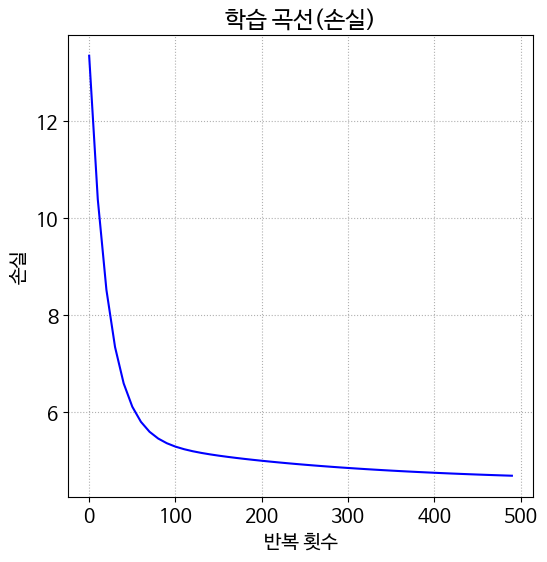

In [118]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

3.7의 결과와 비교해보면 동일한 것을 알 수 있다.
따라서, step 함수는 다음의 코드와 같은 로직을 수행하고 있다.

```py3

 with torch.no_grad():
        # 파라미터 수정
        # 프레임워크를 사용하는 경우는 step 함수가 이를 대신함
        W -= lr * W.grad
        B -= lr * B.grad
```

### 최적화 함수 튜닝

In [ ]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
#Hyper parameters
num_epochs = 500

# 학습률
lr = 0.001

# optimizer로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

# history 기록을 위한 배열 초기화
history2 = np.zeros((0, 2))

In [ ]:
# 루프 처리

for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(X)

    # 손실 계산
    loss = mse(Yp, Y)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 경삿값 초기화
    optimizer.zero_grad()

    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 5.7585
epoch = 20  loss = 5.9541
epoch = 30  loss = 5.0276
epoch = 40  loss = 4.8578
epoch = 50  loss = 4.7052
epoch = 60  loss = 4.6327
epoch = 70  loss = 4.5940
epoch = 80  loss = 4.5698
epoch = 90  loss = 4.5574
epoch = 100  loss = 4.5495
epoch = 110  loss = 4.5452
epoch = 120  loss = 4.5426
epoch = 130  loss = 4.5411
epoch = 140  loss = 4.5403
epoch = 150  loss = 4.5398
epoch = 160  loss = 4.5395
epoch = 170  loss = 4.5393
epoch = 180  loss = 4.5392
epoch = 190  loss = 4.5391
epoch = 200  loss = 4.5391
epoch = 210  loss = 4.5391
epoch = 220  loss = 4.5391
epoch = 230  loss = 4.5390
epoch = 240  loss = 4.5390
epoch = 250  loss = 4.5390
epoch = 260  loss = 4.5390
epoch = 270  loss = 4.5390
epoch = 280  loss = 4.5390
epoch = 290  loss = 4.5390
epoch = 300  loss = 4.5390
epoch = 310  loss = 4.5390
epoch = 320  loss = 4.5390
epoch = 330  loss = 4.5390
epoch = 340  loss = 4.5390
epoch = 350  loss = 4.5390
epoch = 360  loss = 4.5390
epoch = 370

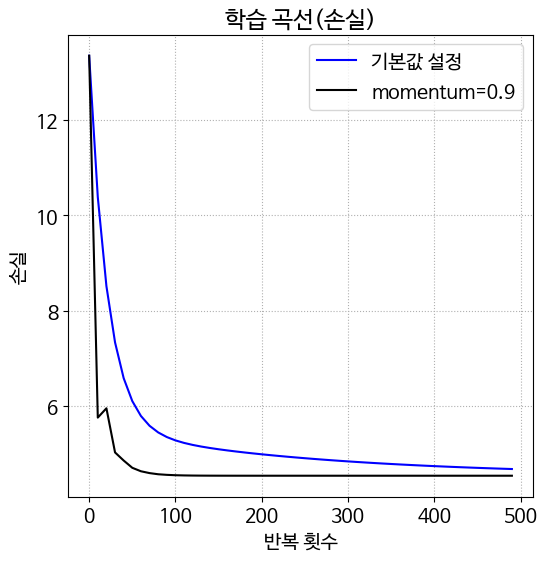

In [ ]:
# 학습 곡선(손실) 출력

plt.plot(history[:,0], history[:,1], 'b', label='기본값 설정')
plt.plot(history2[:,0], history2[:,1], 'k', label='momentum=0.9')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.legend()
plt.title('학습 곡선(손실)')
plt.show()

### y = x**2 함수의 경사하강 (GD)

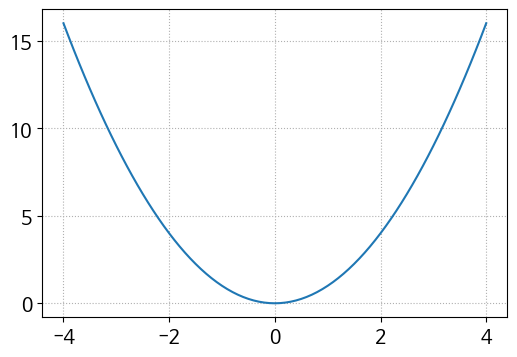

In [ ]:
x = np.arange(-4, 4.1, 0.1)
y = x**2

plt.figure(figsize = (6, 4))
plt.grid(linestyle = ":")
plt.plot(x, y)

## 초기값 (initial value)
x_ = 4
y_ = 16
lr = 0.1

iter = 10
# for _ in range(iter):

#     plt.scatter(x_, y_, s = 80,  c = "r")
#     dy_dx = 2*x_

#     x_ = x_ - lr*dy_dx
#     y_ = x_**2

plt.show()

### Regression GD

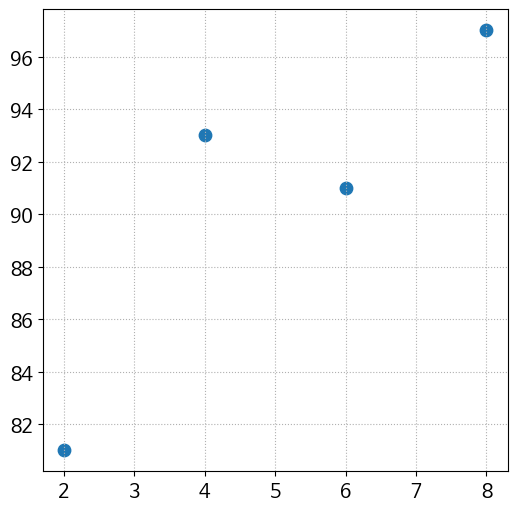

iter = 0, slope = 18.5600, intercept = 3.6200
iter = 100, slope = 8.9456, intercept = 39.3669
iter = 200, slope = 5.7656, intercept = 58.3238
iter = 300, slope = 4.1119, intercept = 68.2131
iter = 400, slope = 3.2519, intercept = 73.3725
iter = 500, slope = 2.7869, intercept = 76.0619


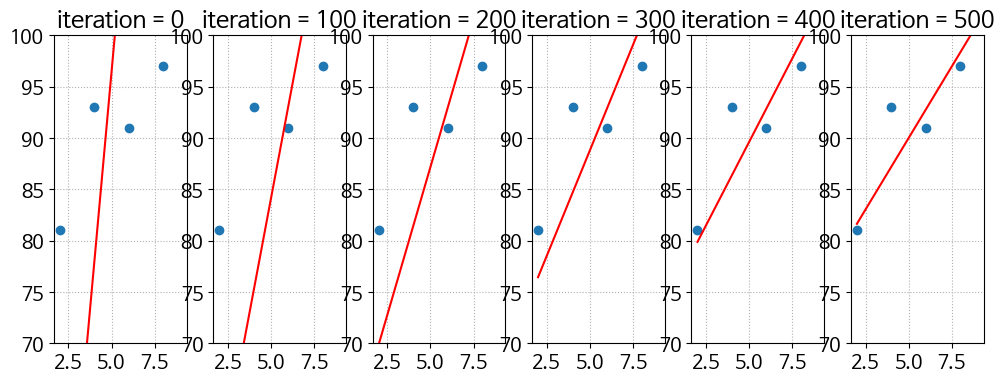

In [ ]:
## X, Y data
x = np.arange(2, 10, step = 2, dtype=np.float16)
y = np.array([81, 93, 91, 97], dtype=np.float16)

plt.scatter(x, y, s = 80)
plt.show()

## 최소제곱법을 이용한 회귀계수 추정
a = 0
b = 0

## learning rate
lr = 0.02
iter = 501


fig, ax = plt.subplots(1, 6, figsize = (12,4))
x_fit = np.arange(2, 10)

j = 0
for i in range(iter):
    y_hat = a*x + b
    error = (y - y_hat)

    a_diff = -(2/len(x))*sum(error*x)
    b_diff = -(2/len(x))*sum(error)

    a = a - lr*a_diff
    b = b - lr*b_diff

    if i % 100 == 0:
        print(f'iter = {i}, slope = {a:.4f}, intercept = {b:.4f}')

        ax[j].scatter(x, y)
        ax[j].plot(x_fit, b + a*x_fit, 'r')
        ax[j].set_title(f'iteration = {i}')
        ax[j].set_ylim(70, 100)

        j += 1

plt.show()



### 복잡한 함수의 GD

Local minimum occurs at: 2.2499646074278457


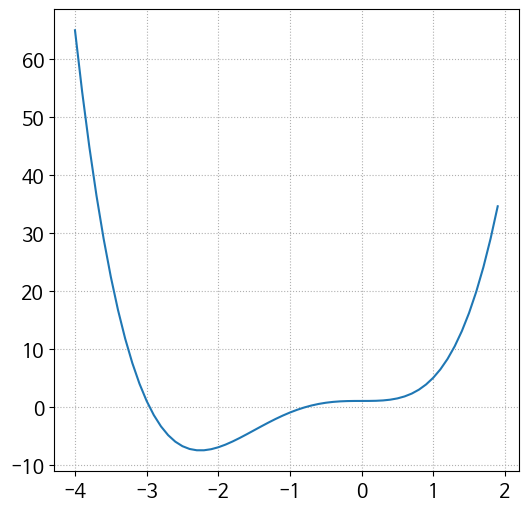

In [ ]:
# From calculation, we expect that the local minimum occurs at x=9/4
x_old = 0
x_new = 6 # The algorithm starts at x=6
eps = 0.01 # step size
precision = 0.00001

def f(x):
    return x**4 + 3*x**3 + 1

def f_prime(x):
    return 4 * x**3 - 9 * x**2

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new = x_old - eps * f_prime(x_old)

print(f"Local minimum occurs at: {x_new}")

x = np.arange(-4, 2, 0.1)

plt.plot(x, f(x))
plt.grid(linestyle = ":")
plt.show()